[Introduction to Qiskit](https://qiskit.org/documentation/intro_tutorial1.html)

When using Qiskit a user workflow nominally consists of following four high-level steps:

* **Build**: Design a quantum circuit(s) that represents the problem you are considering.

* **Compile**: Compile circuits for a specific quantum service, e.g. a quantum system or classical simulator.

* **Run**: Run the compiled circuits on the specified quantum service(s). These services can be cloud-based or local.

* **Analyze**: Compute summary statistics and visualize the results of the experiments

In [1]:
from qiskit import  QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


Total count for 00 and 11 are: {'00': 503, '11': 497}


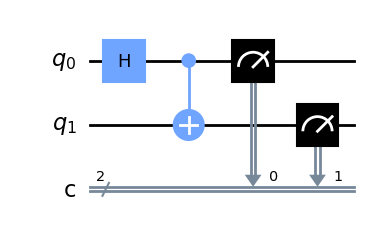

In [2]:
# Use Aer's AerSimulator
simulator = AerSimulator()

# Create a QUantum Circuit acting on the q register
circuit = QuantumCircuit(2,2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX(CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0,1)
# Map the quantum measurement to the classical bits
circuit.measure([0,1],[0,1])

# qreq = QuantumRegister(2, "qreg)
# creg = ClassicalRegister(2, "creg")
# circuit = QuantumCircuit(qreg,creg)
# circuit.measure(qreg,creg)

# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the aer simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Return counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:", counts)

# Draw the circuit
circuit.draw("mpl")

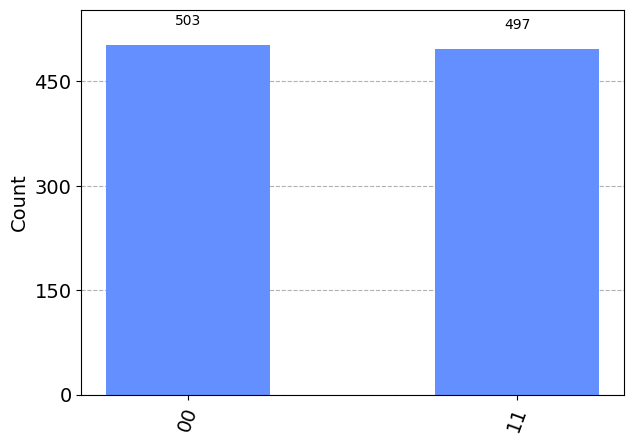

In [3]:
# Plot a histogram
plot_histogram(counts)